In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline  

In [9]:
# x1, x2, y의 데이터 값

# 데이터의 구조: [공부시간, 과외 시간, 실제 취득 성적]
data = [[0, 0, 70], [2, 1, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [row[0] for row in data]  # 독립 변수 1
x2 = [row[1] for row in data]  # 독립 변수 2
yr = [row[2] for row in data]  # 실제 취득 성적

In [10]:
# 기울기 a와 y절편 b의 값을 임의로 정함. 단 기울기의 범위는 0-10 사이, y 절편은 0-100사이에서 변하게 함
a1 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
a2 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0))

y = a1 * x1 + a2 * x2 + b

rmse = tf.sqrt(tf.reduce_mean(tf.square(y - yr)))  # 예측값에서 실제값을 뺌
learning_rate = 0.03  # 학습률 값
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse) 

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    
    for step in range(181):
        session.run(gradient_decent) # 최소의 오차를 찾기위한 경사하강 실행, 학습
        if step % 20 == 0:
            v_rmse = session.run(rmse) # 평균 제곱근 오차
            v_a1 = session.run(a1)           # 기울기 1
            v_a2 = session.run(a2)           # 기울기 2
            v_b = session.run(b)              # y 절편
 
            fmt = "Epoch: %.f, RMSE = %.03f, 기울기 a1 = %.3f, 기울기 a2 = %.3f, y 절편 b = %.3f"
            print(fmt % (step, v_rmse, v_a1, v_a2, v_b))      


Epoch: 0, RMSE = 47.296, 기울기 a1 = 7.924, 기울기 a2 = 7.999, y 절편 b = 80.664
Epoch: 20, RMSE = 29.762, 기울기 a1 = 5.045, 기울기 a2 = 6.606, y 절편 b = 80.125
Epoch: 40, RMSE = 13.042, 기울기 a1 = 2.251, 기울기 a2 = 5.218, y 절편 b = 79.565
Epoch: 60, RMSE = 4.846, 기울기 a1 = 0.511, 기울기 a2 = 4.187, y 절편 b = 79.034
Epoch: 80, RMSE = 4.517, 기울기 a1 = 0.542, 기울기 a2 = 3.915, y 절편 b = 78.709
Epoch: 100, RMSE = 4.263, 기울기 a1 = 0.685, 기울기 a2 = 3.719, y 절편 b = 78.402
Epoch: 120, RMSE = 4.024, 기울기 a1 = 0.820, 기울기 a2 = 3.543, y 절편 b = 78.095
Epoch: 140, RMSE = 3.800, 기울기 a1 = 0.946, 기울기 a2 = 3.388, y 절편 b = 77.788
Epoch: 160, RMSE = 3.591, 기울기 a1 = 1.062, 기울기 a2 = 3.253, y 절편 b = 77.481
Epoch: 180, RMSE = 3.394, 기울기 a1 = 1.168, 기울기 a2 = 3.138, y 절편 b = 77.175


In [11]:
# 검증
# x, y의 데이터 값
# ----------------------------------
# 공부      시간  : 0    2    4    6    8
# 과외 수업 횟수  : 0    1    4    2    3
# 시험      성적  : 60  81   93   91   97
# ----------------------------------
print('학습률 %.2f의 경우' % learning_rate)
print('산출된 선출회귀 모델: y = %.4f × x1 + %.4f × x2 + %.4f' % (v_a1, v_a2, v_b))
# 학습률 0.01의 경우
# 산출된 선형회귀 모델: y = 0.8407 × x1 + 4.4382 × x2 + 79.0128
# 학습률 0.03의 경우
# 산출된 선형회귀 모델: y = 0.9186 × x1 + 3.6437 × x2 + 77.1793

학습률 0.03의 경우
산출된 선출회귀 모델: y = 1.1681 × x1 + 3.1379 × x2 + 77.1752


In [12]:
print(x1)
print(range(len(x1)))
print(range(4))

for i in range(len(x1)):     # 1차원 배열
    print(x1[i])
    
for i in range(len(data)):  # 2차원 배열
    print(data[i])          # 1차원 배열 출력

print('\n------------------------')
for i in range(len(data)):  # 2차원 배열
    print(' ', data[i][0], end='')  # 각행의 0번째 컬럼 출력
print('\n------------------------')
for i in range(len(data)):  # 2차원 배열
    print(' ', data[i][1], end='')  # 각행의 1번째 컬럼 출력     

[0, 2, 4, 6, 8]
range(0, 5)
range(0, 4)
0
2
4
6
8
[0, 0, 70]
[2, 1, 81]
[4, 4, 93]
[6, 2, 91]
[8, 3, 97]

------------------------
  0  2  4  6  8
------------------------
  0  1  4  2  3

공부시간: 0, 과외 시간: 0, 실제 성적: 60, 예상 성적: 77
공부시간: 2, 과외 시간: 0, 실제 성적: 81, 예상 성적: 79
공부시간: 4, 과외 시간: 4, 실제 성적: 93, 예상 성적: 95
공부시간: 6, 과외 시간: 2, 실제 성적: 91, 예상 성적: 90
공부시간: 8, 과외 시간: 3, 실제 성적: 97, 예상 성적: 95


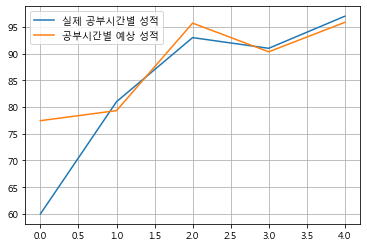

In [8]:
# 학습률 0.03의 경우
# 산출된 선출회귀 모델: y = 0.9186 × x1 + 3.6437 × x2 + 77.1793
predict = []
for i in range(len(data)): # 0 ~ 4
    y = v_a1 * data[i][0] + v_a2 * data[i][1] + v_b 
    predict.append(y) 
    fmt = '공부시간: %d, 과외 시간: %d, 실제 성적: %d, 예상 성적: %d' 
    print(fmt % (data[i][0], data[i][1], data[i][2], predict[i]))

plt.plot(yr, label='실제 공부시간별 성적')
plt.plot(predict, label='공부시간별 예상 성적')
plt.legend()
plt.grid(True)
plt.show()

# 추세선이 성적의 흐름과 비슷함.